# Imports

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import roc_curve,auc
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import zscore

a)	Refer to this link, https://archive.ics.uci.edu/ml/datasets/parkinsons and read the description of the dataset and attach suitable headers.

#### Data Set Information:

This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD. 

#### Attribute Information:

Matrix column entries (attributes): 

name - ASCII subject name and recording number 

MDVP:Fo(Hz) - Average vocal fundamental 

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency 

MDVP:Flo(Hz) - Minimum vocal fundamental frequency 

MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency

MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude 

NHR,HNR - Two measures of ratio of noise to tonal components in the voice 

status - Health status of the subject (one) - Parkinson's, (zero) - healthy 

RPDE,D2 - Two nonlinear dynamical complexity measures 

DFA - Signal fractal scaling exponent 

spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 

In [3]:
#reading data
df=pd.read_csv("D:\\Downloads\\parkinson.csv")

In [66]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [67]:
df.shape

(195, 24)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


b)	Status is the outcome variable, with ‘0’ – healthy and ‘1’ – Parkinson Disease. Perform EDA and apply suitable algorithm (pick among Logistic Regression, Naive’s Bayes, KNN), which is giving best score with 70/30 validation split with precision and recall score, ROC curve and AUC value. Finally, choose the best model out of 3.

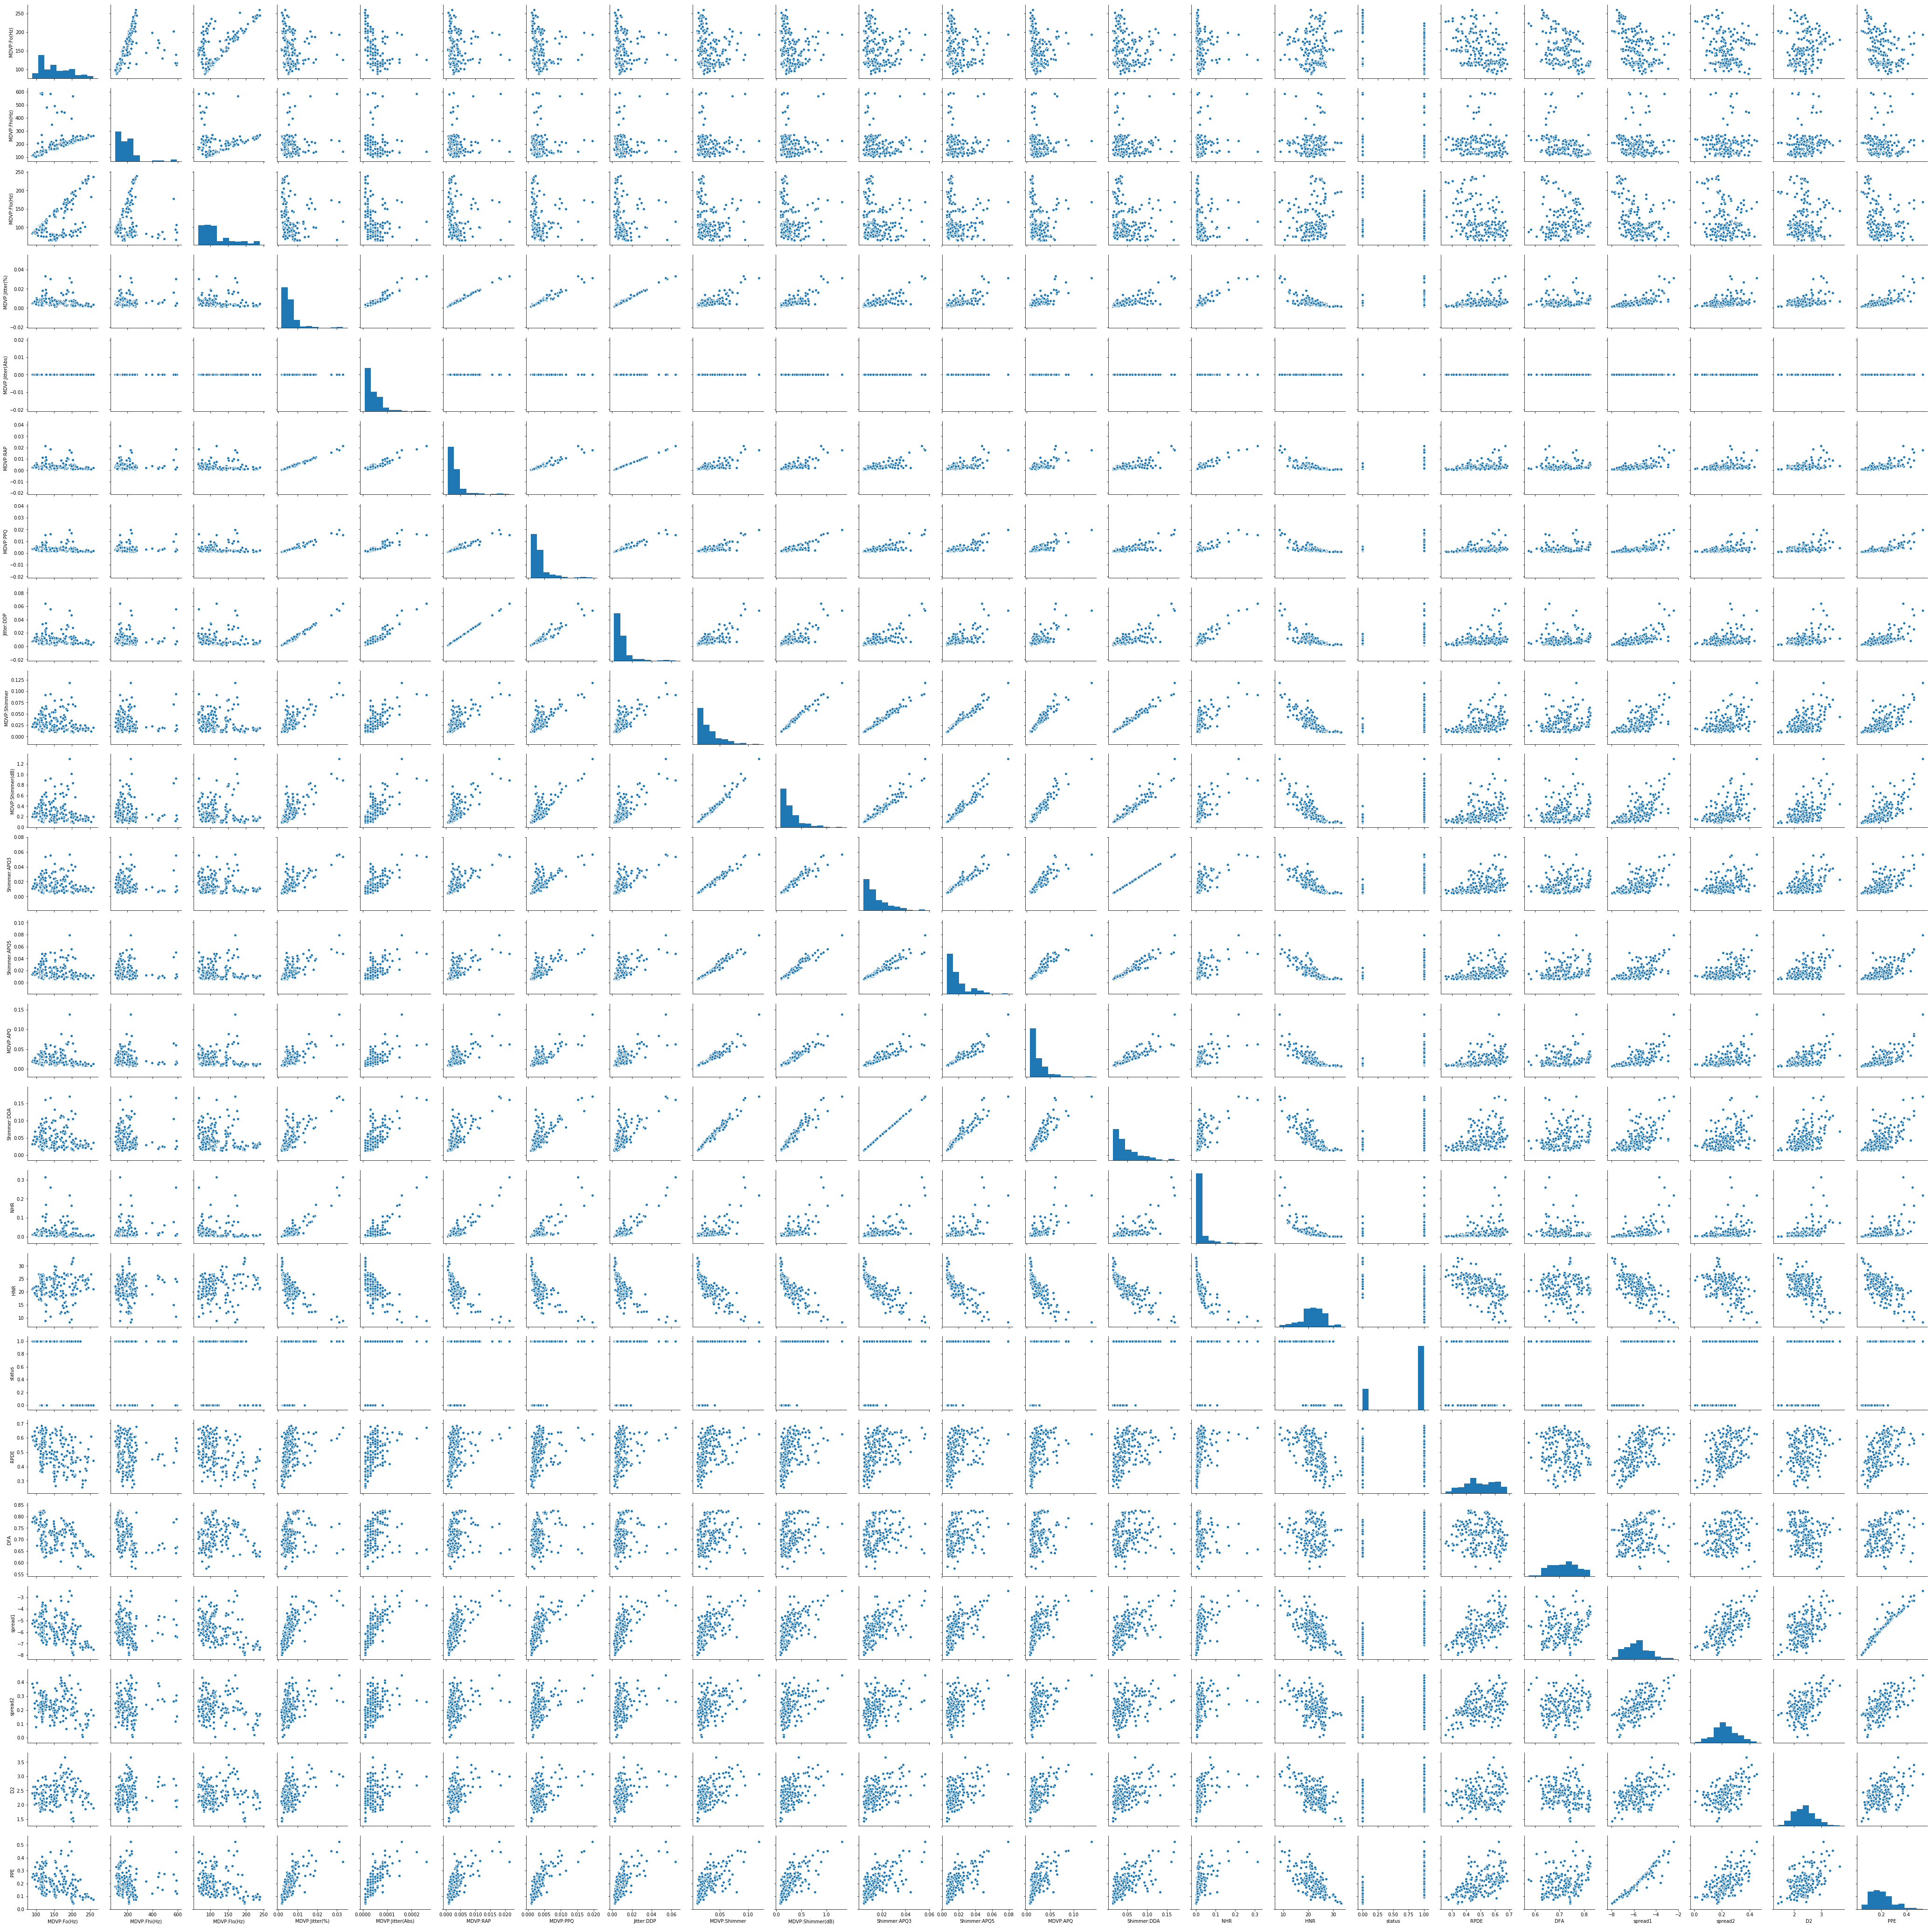

In [10]:
sns.pairplot(df)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [ ]:
#There are no missing values in the data set

In [4]:
df1= df.drop("name",axis=1)

In [97]:
values=df1.values 

In [101]:
df1.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [5]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X =  df1.drop("status", axis=1)
y =  df1.pop("status")


In [6]:
train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=1)

# Logistic Regression

In [35]:
# Let us look at the target column which is 'status' to understand how the data is distributed amongst the various values
df.groupby(["status"]).count().T

status,0,1
name,48,147
MDVP:Fo(Hz),48,147
MDVP:Fhi(Hz),48,147
MDVP:Flo(Hz),48,147
MDVP:Jitter(%),48,147
MDVP:Jitter(Abs),48,147
MDVP:RAP,48,147
MDVP:PPQ,48,147
Jitter:DDP,48,147
MDVP:Shimmer,48,147


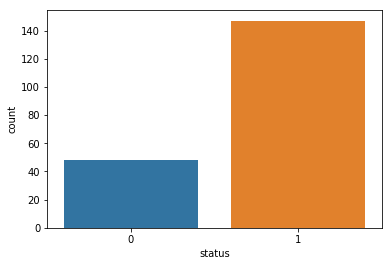

In [36]:
sns.countplot(x='status',data=df)
plt.show()

In [37]:
count_no_sub = len(df[df['status']==0])
count_sub = len(df[df['status']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("healthy is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("parkinson's disease", pct_of_sub*100)

healthy is 24.615384615384617
parkinson's disease 75.38461538461539


In [7]:
log_reg_model= LogisticRegression()
log_reg_model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
log_reg_model.intercept_

array([0.85731671])

In [42]:
log_reg_model.coef_

array([[-5.48247706e-03, -3.16083009e-03, -3.30317313e-03,
         1.16269905e-02,  9.63551116e-05,  9.88304312e-03,
         8.28463033e-03,  2.96445455e-02,  1.35057293e-01,
         1.27980445e+00,  7.09566878e-02,  8.09088684e-02,
         1.12939251e-01,  2.12854136e-01,  2.72876179e-02,
         1.23053244e-01,  5.92200509e-01,  8.90311341e-01,
         1.26731706e+00,  6.37841900e-01,  2.40356815e+00,
         6.67226881e-01]])

In [9]:
y_predict_log_reg=log_reg_model.predict(test_set)

In [10]:
acc_log_reg=metrics.accuracy_score(test_labels,y_predict_log_reg)
print(acc_log_reg)

0.8135593220338984


In [11]:
cr_log_reg=metrics.classification_report(y_predict_log_reg,test_labels) #classification report
print(cr_log_reg)

             precision    recall  f1-score   support

          0       0.58      0.79      0.67        14
          1       0.93      0.82      0.87        45

avg / total       0.84      0.81      0.82        59



Area under the curve 0.803968253968254


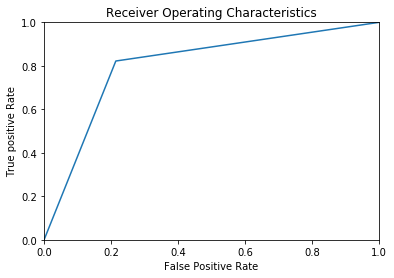

In [46]:
fpr,tpr,_=roc_curve(y_predict_log_reg,test_labels)
roc_auc=auc(fpr,tpr)
print('Area under the curve',roc_auc)
plt.figure()
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.title('Receiver Operating Characteristics')
plt.show()

# Naive’s Bayes

In [12]:
model_NB = GaussianNB()
model_NB.fit(train_set, train_labels)

GaussianNB(priors=None)

In [13]:
y_predict_NB=model_NB.predict(test_set)

In [14]:
acc_NB=metrics.accuracy_score(test_labels,y_predict_NB)
print(acc_NB)

0.711864406779661


In [15]:
cr_NB=metrics.classification_report(y_predict_NB,test_labels) #classification report
print(cr_NB)

             precision    recall  f1-score   support

          0       0.95      0.53      0.68        34
          1       0.60      0.96      0.74        25

avg / total       0.80      0.71      0.70        59



Area under the curve 0.7447058823529411


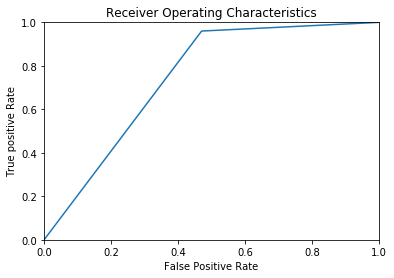

In [52]:
fpr,tpr,_=roc_curve(y_predict_NB,test_labels)
roc_auc=auc(fpr,tpr)
print('Area under the curve',roc_auc)
plt.figure()
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.title('Receiver Operating Characteristics')
plt.show()

# KNN

In [16]:
model_KNN = KNeighborsClassifier(n_neighbors= 7 , weights = 'uniform', metric='euclidean')

In [79]:
model_KNN.fit(train_set, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [80]:
y_predict_KNN=model_KNN.predict(test_set)

In [81]:
acc_KNN=metrics.accuracy_score(test_labels,y_predict_KNN)
print(acc_KNN)

0.7457627118644068


In [82]:
cr_KNN=metrics.classification_report(y_predict_KNN,test_labels) #classification report
print(cr_KNN)

             precision    recall  f1-score   support

          0       0.37      0.70      0.48        10
          1       0.93      0.76      0.83        49

avg / total       0.83      0.75      0.77        59



Area under the curve 0.7275510204081632


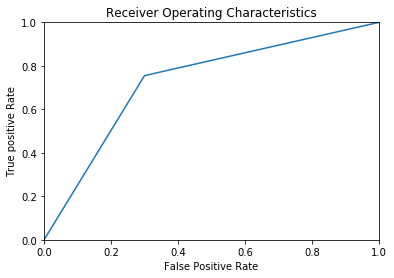

In [83]:
fpr,tpr,_=roc_curve(y_predict_KNN,test_labels)
roc_auc=auc(fpr,tpr)
print('Area under the curve',roc_auc)
plt.figure()
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.title('Receiver Operating Characteristics')
plt.show()

In [ ]:
#The best model out of Logistic regression, naive bayes and KNN, by looking into the recall rates
recall values
log-reg=0.81
NB=0.71
KNN=0.72
#logistic regression has the highest recall rate i.e which predicts perkinson's disease as a disease which is the True Positive Rate(TPR)

# by looking into AUC value,
log-reg=0.80
NB=0.74
KNN=0.72
# logistic regression has the highest AUC value 

In [84]:
models = [] # display everything as list
models.append(('Logistic regression', log_reg_model)) 
models.append(("Naive's Bayes", model_NB))
models.append(("KNN", model_KNN))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=1) #n_splits 10 groups of equal splits it will drop the fractions
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring) #full data set is passed bcz kfold #scoring in log.reg is RMSE
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

Logistic regression: 0.807895 (0.187921)
Naive's Bayes: 0.674737 (0.239734)
KNN: 0.752105 (0.173915)


c)	Optimize the model (best model picked in ‘b’) with boosting technique and observe the validation score.

In [26]:
from sklearn.ensemble import AdaBoostClassifier
#abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
abcl = AdaBoostClassifier( base_estimator=log_reg_model,n_estimators= 1000)
abcl.fit(X,y)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=1000, random_state=None)

In [18]:
y_predict_boost=abcl.predict(X)

In [19]:
y_predict_boost

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1],
      dtype=int64)

In [159]:
metrics.accuracy_score(y,y_predict_boost)

0.8564102564102564

In [160]:
acc=metrics.accuracy_score(y,y_predict_boost)
print(acc*100)

85.64102564102564


In [161]:
cr=metrics.classification_report(y,y_predict_boost)
print(cr)

             precision    recall  f1-score   support

          0       0.74      0.65      0.69        48
          1       0.89      0.93      0.91       147

avg / total       0.85      0.86      0.85       195



In [162]:
cm=metrics.confusion_matrix(y,y_predict_boost)
print(cm)

[[ 31  17]
 [ 11 136]]


Area under the curve 0.7855017006802721


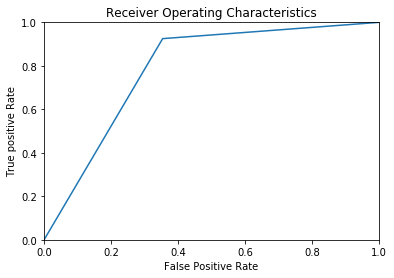

In [163]:
fpr,tpr,_=roc_curve(y,y_predict_boost)
roc_auc=auc(fpr,tpr)
print('Area under the curve',roc_auc)
plt.figure()
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.title('Receiver Operating Characteristics')
plt.show()

d)	Comment on (c), whether boosting is improving the model performance or not.

In [ ]:
#On performing boosting to the logistic regression model the performance has been increased from 80 to 85
#there is an increase in recall values from 0.80 to 0.86
#boosting has improved the model performance

e)	Optimize the model (best model picked in ‘b’) with bagging technique and observe the validation score

In [28]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(base_estimator=log_reg_model, n_estimators=1000, max_samples=.5,oob_score=True) 
bgcl = bgcl.fit(X,y)
bgcl.oob_score_

0.8615384615384616

In [151]:
production_pred=bgcl.predict(X)

In [152]:
acc=metrics.accuracy_score(y,production_pred)
print(acc*100)

87.6923076923077


In [165]:
cr=metrics.classification_report(y,production_pred)
print(cr) #here specificity is high than sensitivity

             precision    recall  f1-score   support

          0       0.93      0.54      0.68        48
          1       0.87      0.99      0.92       147

avg / total       0.88      0.88      0.86       195



Area under the curve 0.764030612244898


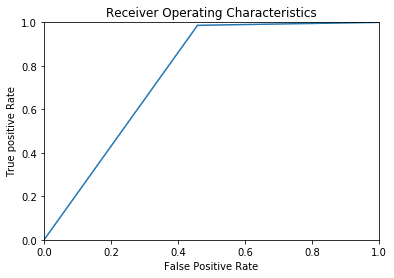

In [164]:
fpr,tpr,_=roc_curve(y,production_pred)
roc_auc=auc(fpr,tpr)
print('Area under the curve',roc_auc)
plt.figure()
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.title('Receiver Operating Characteristics')
plt.show()

f)	Comment on (e), whether bagging is improving the model performance or not.

In [ ]:
#On performing bagging the performance of the logistic regression model accuracy is found to increase from 0.80 to 0.87
#also there is an increase in the recall values from 0.80 to 0.88
#which implies bagging is improving the model performance 

g)	Compare and Contrast both bagging and booting technique over the best model selected during the step ‘b’ with Bias and Variance Error using 5-fold Cross Validation Score.

Bias error: is useful to quantify how much on an average are the predicted values different from the actual value. A high bias error means we have a under-performing model which keeps on missing important trends
Variance error on the other side quantifies how are the prediction made on same observation different from each other. A high variance model will over-fit on your training population and perform badly on any observation beyond training.

In [ ]:
bagging highly focuses on reducing variance error
boosting highly focuses on reducing bias error

In [29]:
models = [] # display everything as list
models.append(('Logistic regression', log_reg_model)) 
models.append(('Boosting',abcl))
models.append(('Bagging',bgcl))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=5, random_state=1) #n_splits 10 groups of equal splits it will drop the fractions
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring) #full data set is passed bcz kfold #scoring in log.reg is RMSE
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

Logistic regression: 0.800000 (0.155038)
Boosting: 0.779487 (0.129328)
Bagging: 0.779487 (0.181744)


In [ ]:
h)	Give your final inference, which optimization technique (Bagging/Boosting) would be chosen while the best model picked in step ‘b’, is going for production system.

In [ ]:
# the bagging optimisation technique gives a good result even after beforming k fold cross validation 
# hence bagging would be chosen while the best model picked is logistic regression which is going for production system